In [146]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt 

# seaboarn lib add
import seaborn as sns

import time

%matplotlib inline


import json 

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


print('numpy version  - ' , np.__version__)
print('pandas version - ' , pd.__version__)

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
    print('d')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
    print('w')
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

# ml lib
import sklearn
from   sklearn.datasets import load_iris , load_breast_cancer , load_digits

from   sklearn.model_selection import train_test_split , KFold , StratifiedKFold , cross_val_score , cross_validate , GridSearchCV
from   sklearn.tree            import DecisionTreeClassifier

from   sklearn.ensemble        import RandomForestClassifier , VotingClassifier , AdaBoostClassifier

from   xgboost                 import XGBClassifier

from   sklearn.svm             import SVC
from   sklearn.neighbors       import KNeighborsClassifier

from   sklearn.linear_model    import LogisticRegression , LinearRegression

from   sklearn.metrics         import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , make_scorer , precision_recall_curve , roc_curve , roc_auc_score

# regression 성능평가 지표
from   sklearn.metrics         import mean_squared_error , mean_absolute_error


from   sklearn.preprocessing   import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler ,Binarizer
from   sklearn.impute          import SimpleImputer

from   sklearn.base            import BaseEstimator

import missingno as msno 

import graphviz

from IPython.display import Image


print('sklearn version - ' , sklearn.__version__)

numpy version  -  1.20.1
pandas version -  1.2.4
w
sklearn version -  0.24.1


#### Regression(회귀)
- 회귀란 종속변수(target)와 하나 이상의 독립변수(feature)간의 관계를 모델링하는 선형 또는 비선형 접근법

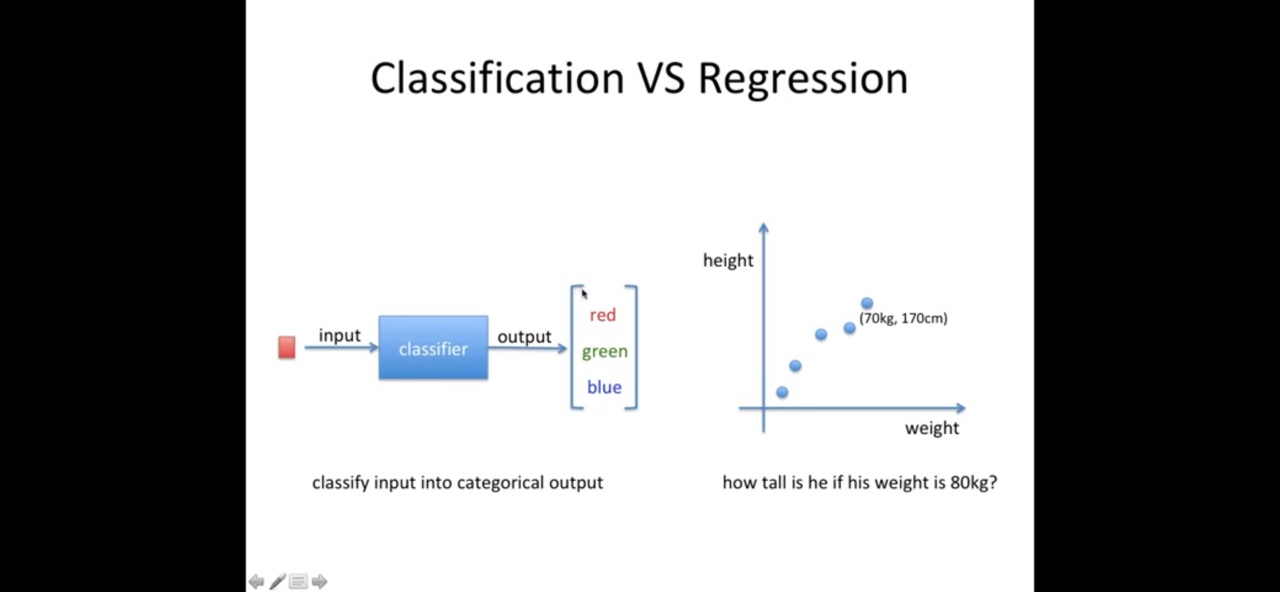

In [2]:
Image('c:/linear_img/linear01.png.jpg', width = 700)

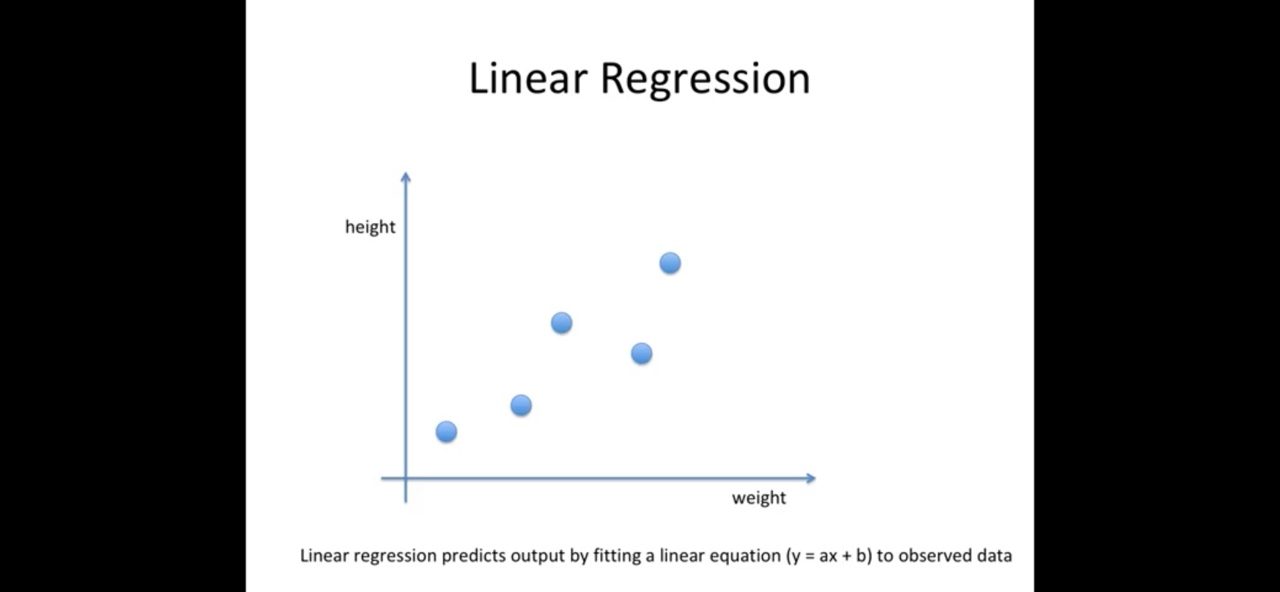

In [3]:
Image('c:/linear_img/linear02.png.jpg', width = 700)

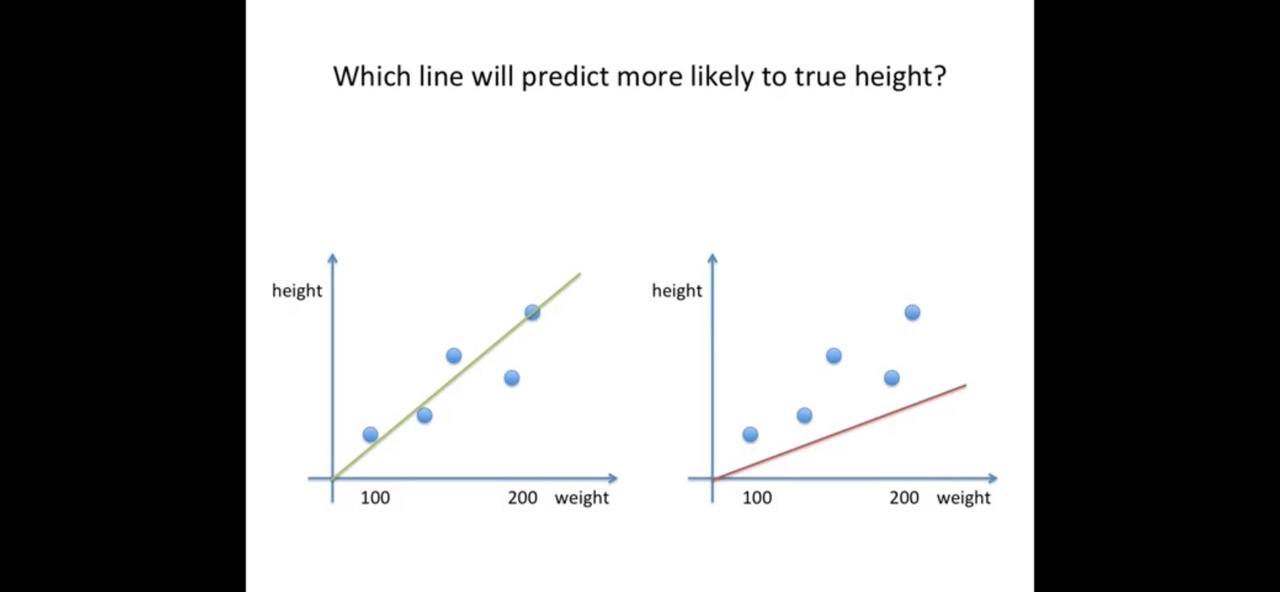

In [4]:
Image('c:/linear_img/linear03.png.jpg', width = 700)

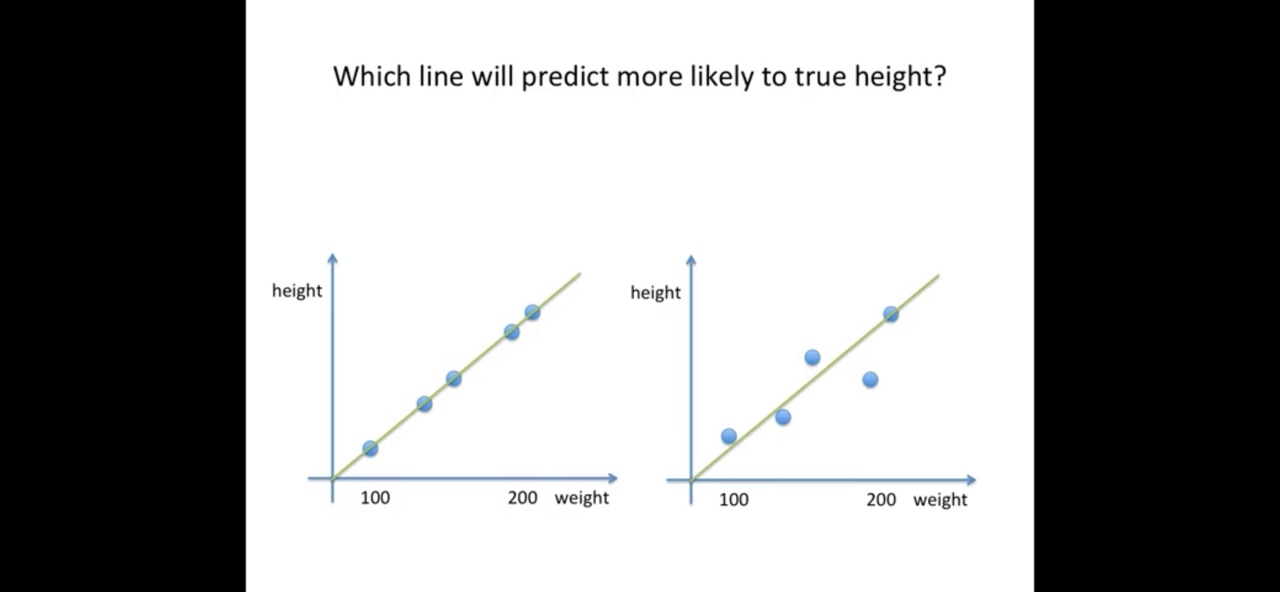

In [5]:
Image('c:/linear_img/linear04.png.jpg', width = 700)

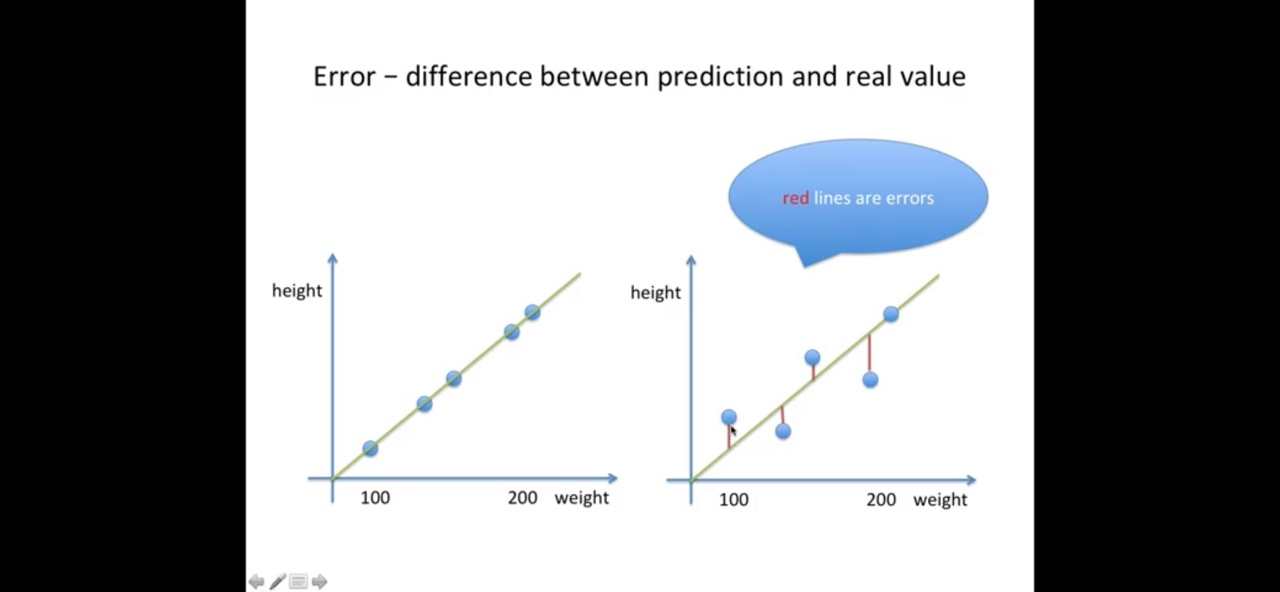

In [6]:
Image('c:/linear_img/linear05.png.jpg', width = 700)

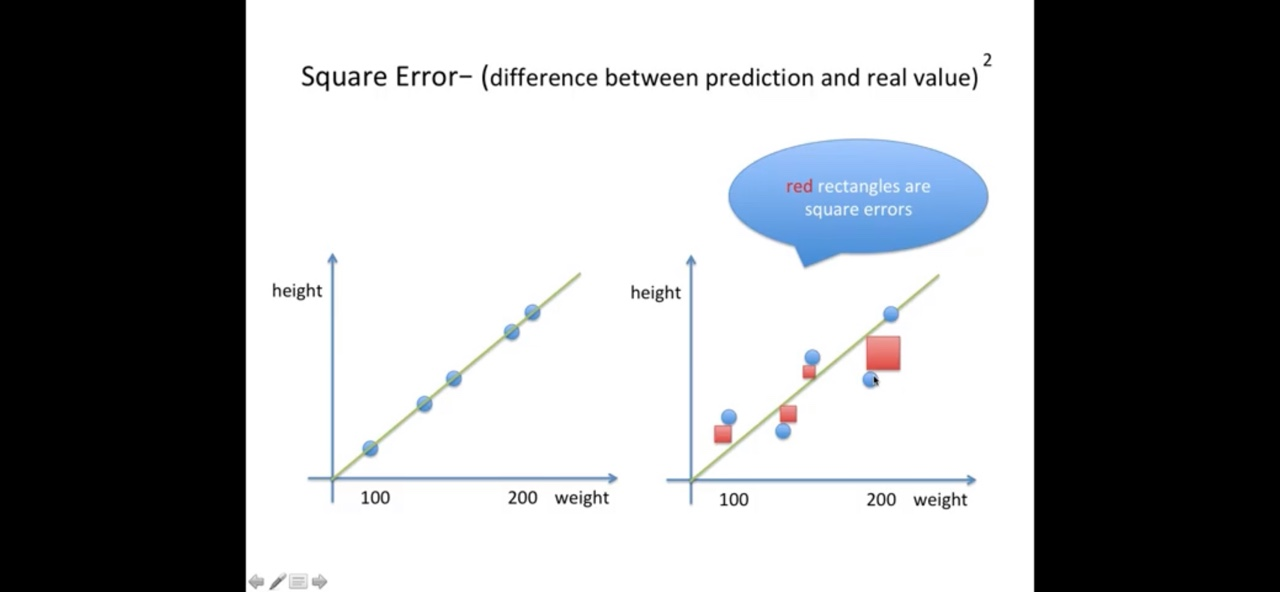

In [7]:
Image('c:/linear_img/linear06.png.jpg', width = 700)

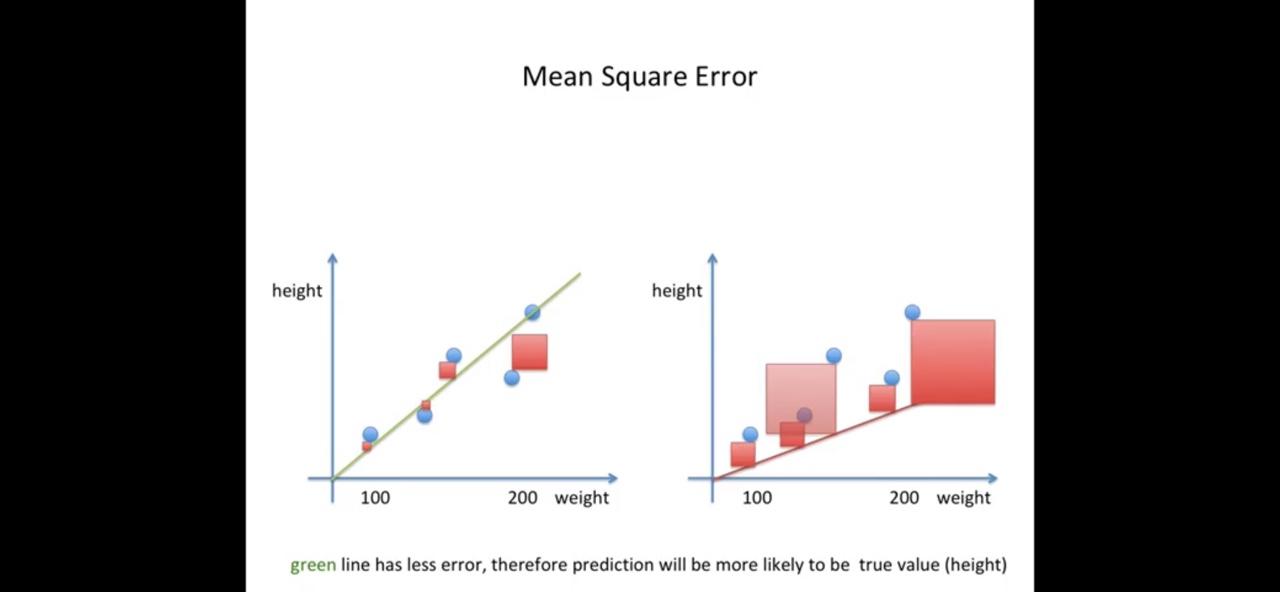

In [8]:
Image('c:/linear_img/linear07.png.jpg', width = 700)

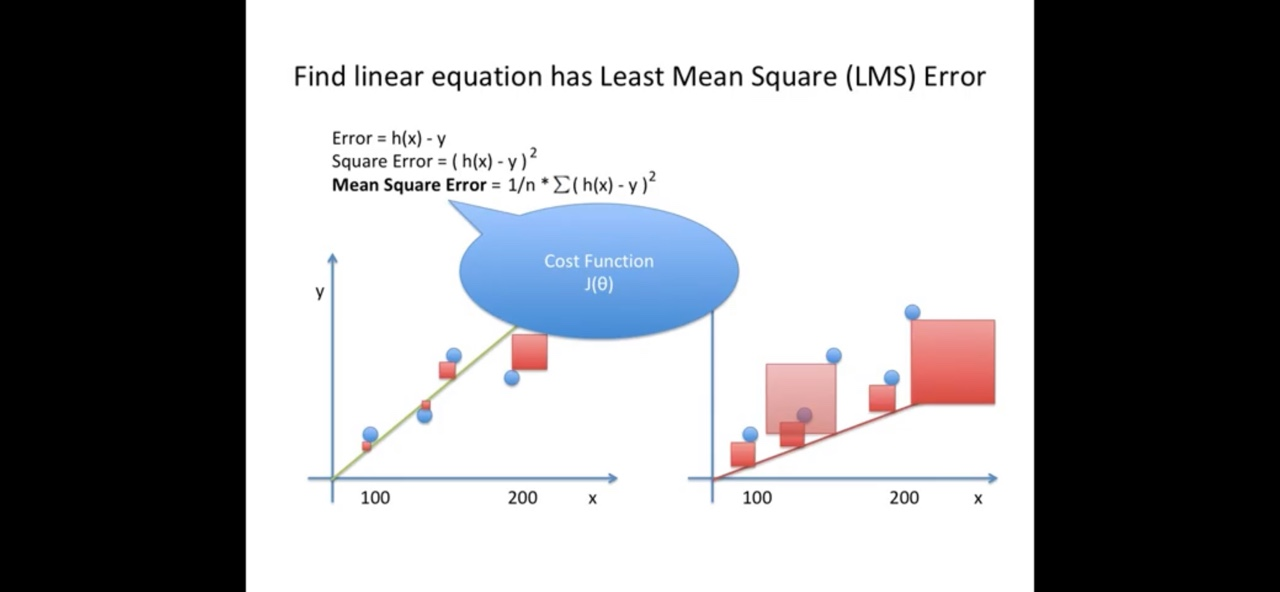

In [10]:
Image('c:/linear_img/linear09.png.jpg', width = 700)

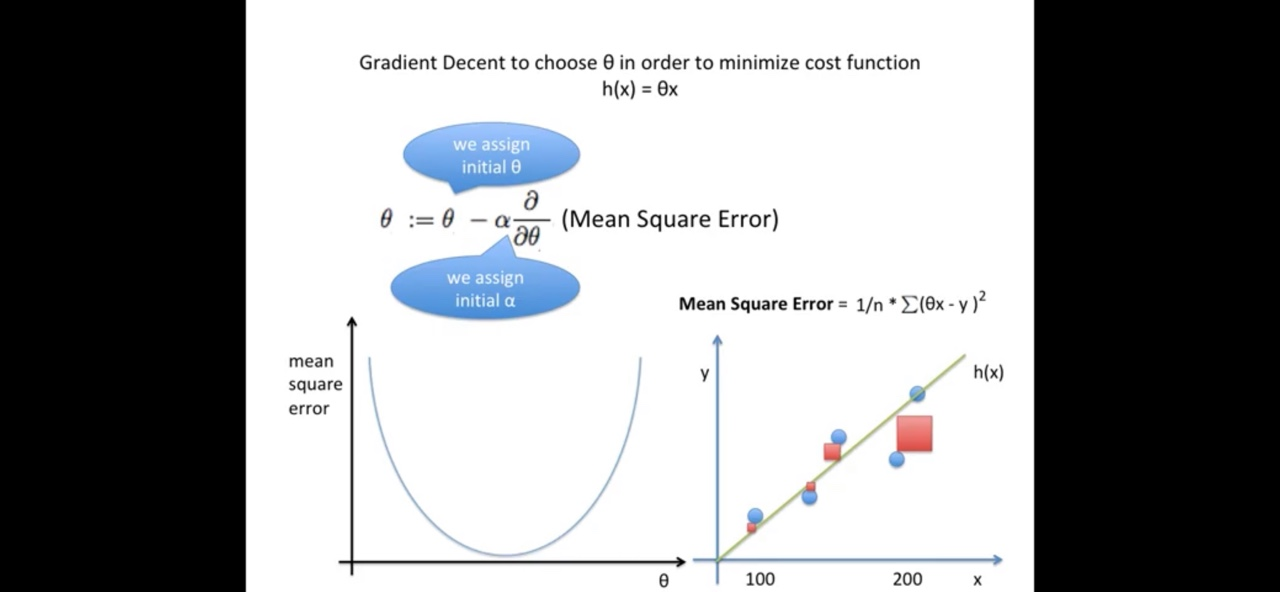

In [11]:
Image('c:/linear_img/linear10.png.jpg', width = 700)

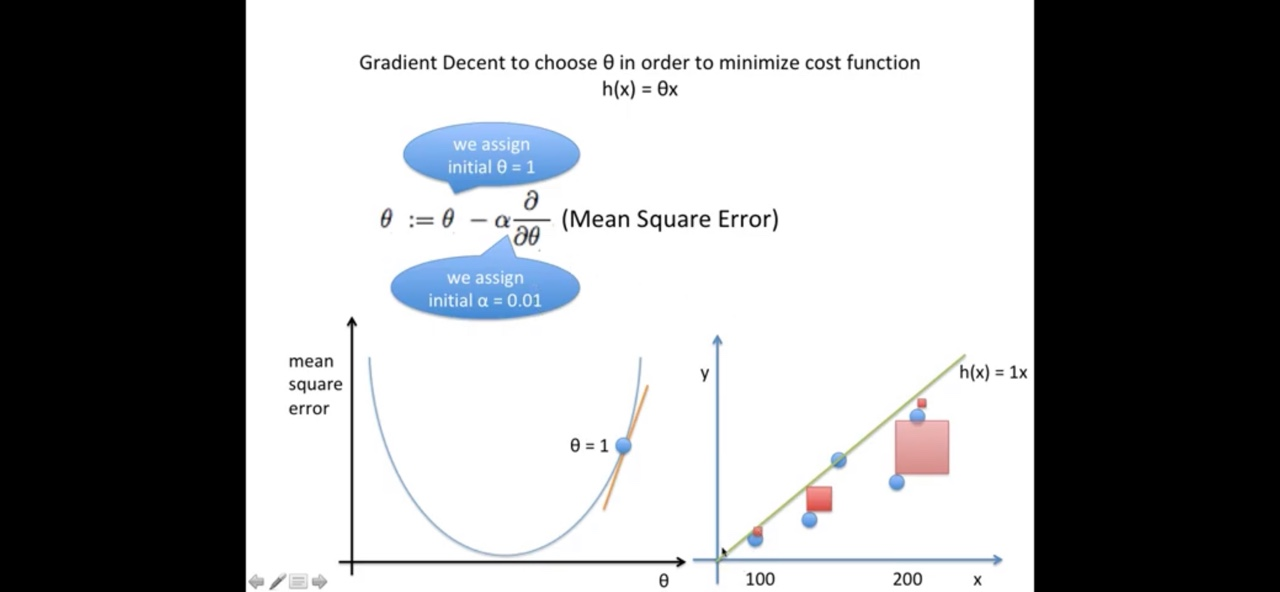

In [12]:
Image('c:/linear_img/linear11.png.jpg', width = 700)

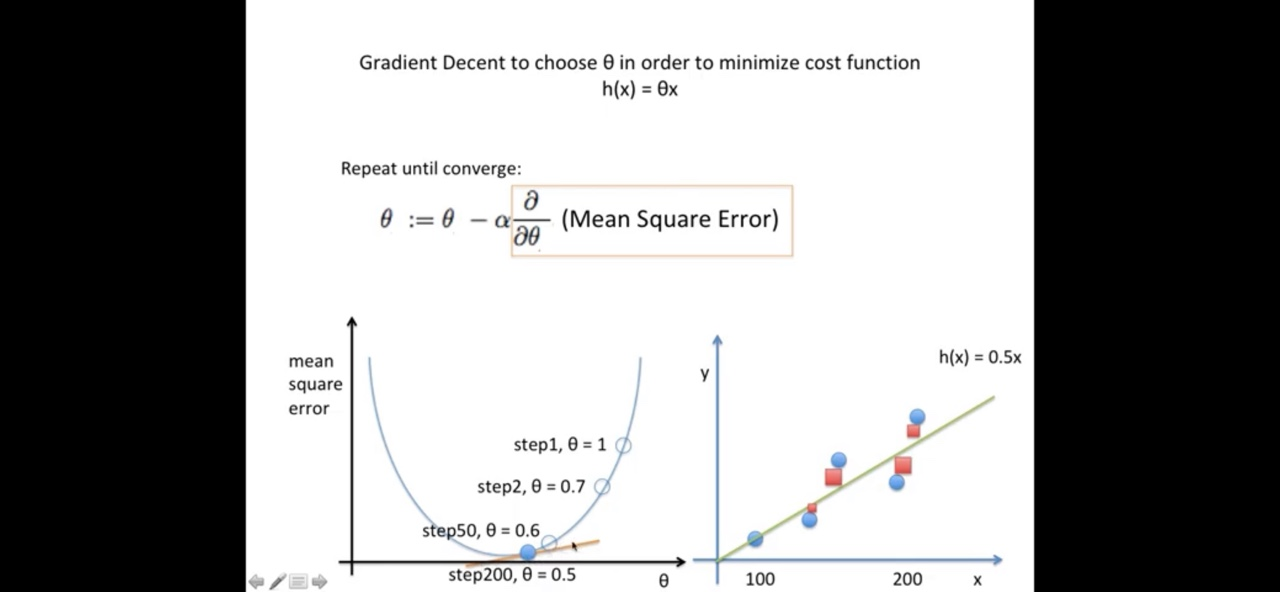

In [13]:
Image('c:/linear_img/linear15.png.jpg', width = 700)

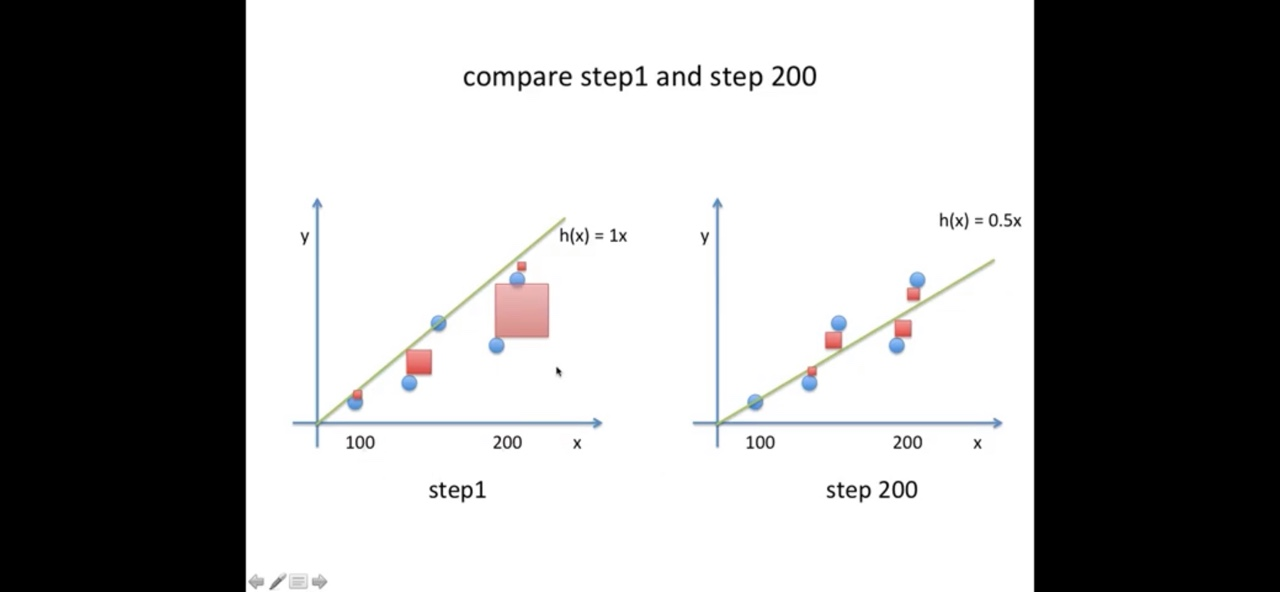

In [14]:
Image('c:/linear_img/linear16.png.jpg', width = 700)

#### linear Regression

* f(x) = wx + b 
* 예측함수를 통해서 예측값과 실제값의 차이를 계산
* cost(w,b) - 업데이트를 통해서 w,b 값을 조정
* 위 과정을 특정 횟수만큼 반복
* 수정된 f(x) = wx + b 
* 독립변수 또는 설명변수 -> feature , 종속변수 -> target(수치형)
* 독립변수 개수의 따라서 : 단일회귀 , 다중회귀

In [16]:
print('단일회귀 - ')
print()
frm = pd.DataFrame({
'height': [1.47, 1.50, 1.52, 1.55, 1.57, 1.60, 1.63, 1.65, 1.68, 1.70, 1.73, 1.75, 1.78, 1.80, 1.83],
'mass': [52.21, 53.12, 54.48, 55.84, 57.20, 58.57, 59.93, 61.29, 63.11, 64.47, 66.28, 68.10, 69.92, 72.19, 74.46],
})
frm

단일회귀 - 



,height,mass
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


In [19]:
print('독립변수 또는 설명변수 - ')
X = frm[['height']]

독립변수 또는 설명변수 - 


In [20]:
print('종속변수 - ')
Y = frm[['mass']]

종속변수 - 


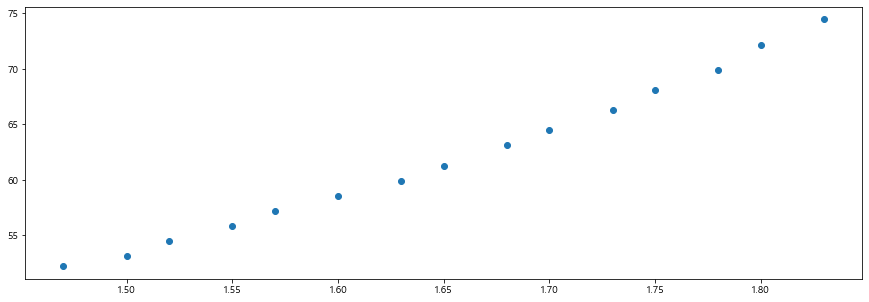

In [22]:
plt.figure(figsize=(15,5))

plt.plot(X, Y , 'o')

plt.show()
plt.close()

In [25]:
linear_model = LinearRegression()
linear_model.fit(X , Y)

LinearRegression()

In [35]:
print('사용자 데이터를 입력하여 예측값을 확인 - ')
user_pred = linear_model.predict([[1.79]])
print(user_pred)
print()
y_pred = linear_model.predict(X)
print(y_pred)



사용자 데이터를 입력하여 예측값을 확인 - 
[[70.61525799]]

[[51.0081583 ]
 [52.84632389]
 [54.07176763]
 [55.90993322]
 [57.13537695]
 [58.97354255]
 [60.81170814]
 [62.03715188]
 [63.87531747]
 [65.1007612 ]
 [66.9389268 ]
 [68.16437053]
 [70.00253613]
 [71.22797986]
 [73.06614545]]


In [31]:
print('w = 기울기 : ' , linear_model.coef_)
print()
print('b = 절편   : ' , linear_model.intercept_)

w = 기울기 :  [[61.27218654]]

b = 절편   :  [-39.06195592]


In [32]:
(61.27218654 * 1.79) + -39.06195592

70.6152579866

In [34]:
print('R - squared(결정계수)')
print()
print('R = ' , linear_model.score(X,Y))

R - squared(결정계수)

R =  0.9891969224457968


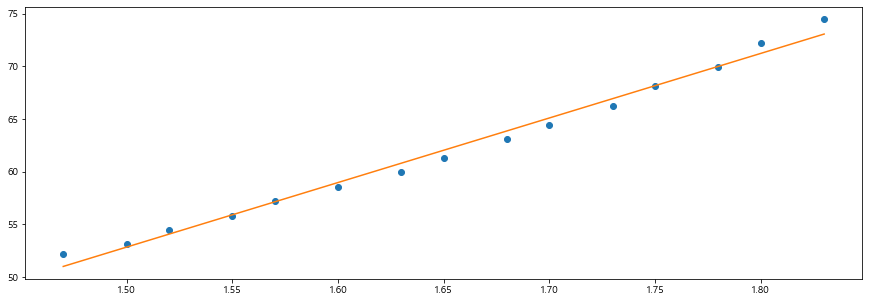

In [37]:
plt.figure(figsize=(15,5))

plt.plot(X, Y , 'o')
plt.plot(X , linear_model.predict(X))

plt.show()
plt.close()

#### auto-mpg.csv 선형회귀 [실습]

In [41]:
raw_data = pd.read_csv('./data/auto-mpg.csv' , header=None)
raw_data.columns = ['mpg' , 'cylinders' , 'displacement' , 'horsepower' , 'weight' , 'acc' , 'model year' , 'origin' , 'name']
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acc           398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [42]:
raw_data.describe()

,mpg,cylinders,displacement,weight,acc,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [43]:
raw_data['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

* horsepower(엔진출력)
* '?' -> 대체


In [44]:
raw_data['horsepower'].replace('?' , np.NaN , inplace = True)

In [45]:
raw_data['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', nan, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [46]:
raw_data.dropna(subset=['horsepower'] , axis = 0 , inplace = True)


In [47]:
raw_data['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [48]:
raw_data['horsepower'] = raw_data['horsepower'].astype('float')
raw_data['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [49]:
print('다중회귀 - 분석에 활용한 독립변수를 선택 - ')
mpg_subset_frm = raw_data[['mpg' , 'cylinders' , 'horsepower' , 'weight']]
mpg_subset_frm

다중회귀 - 분석에 활용한 독립변수를 선택 - 


,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0
...,...,...,...,...
393,27.0,4,86.0,2790.0
394,44.0,4,52.0,2130.0
395,32.0,4,84.0,2295.0
396,28.0,4,79.0,2625.0


선형관계를 파악하기 위해서 산점도 - 
mpg - cylinders



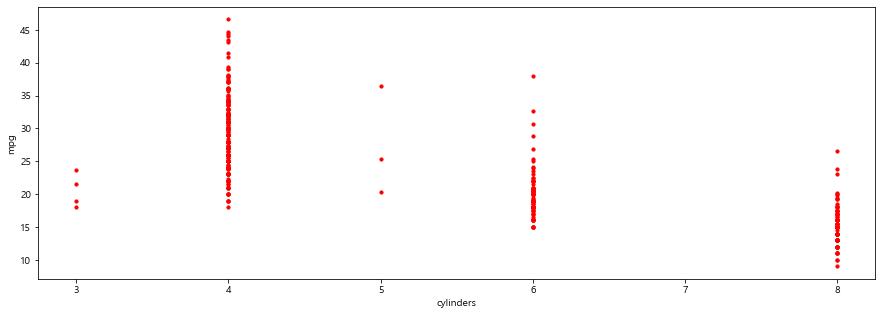

In [50]:
print('선형관계를 파악하기 위해서 산점도 - ')
print('mpg - cylinders')
print()

mpg_subset_frm.plot(kind='scatter' , x = 'cylinders' , y='mpg' , c='red' , s = 10 , figsize=(15,5))
plt.show()
plt.close()


mpg - weight



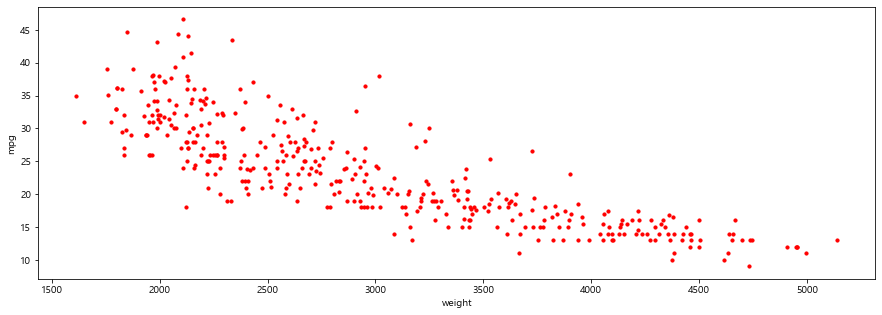

In [52]:
print('mpg - weight')
print()

mpg_subset_frm.plot(kind='scatter' , x = 'weight' , y='mpg' , c='red' , s = 10 , figsize=(15,5))
plt.show()
plt.close()

mpg - horsepower



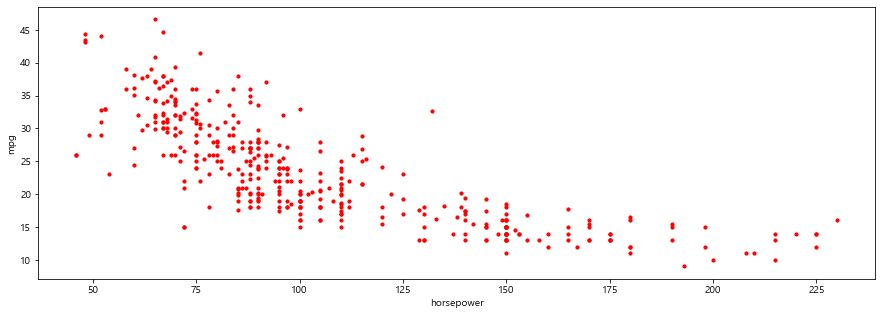

In [53]:
print('mpg - horsepower')
print()

mpg_subset_frm.plot(kind='scatter' , x = 'horsepower' , y='mpg' , c='red' , s = 10 , figsize=(15,5))
plt.show()
plt.close()

seaborn - 선형관계를 파악해 본다면



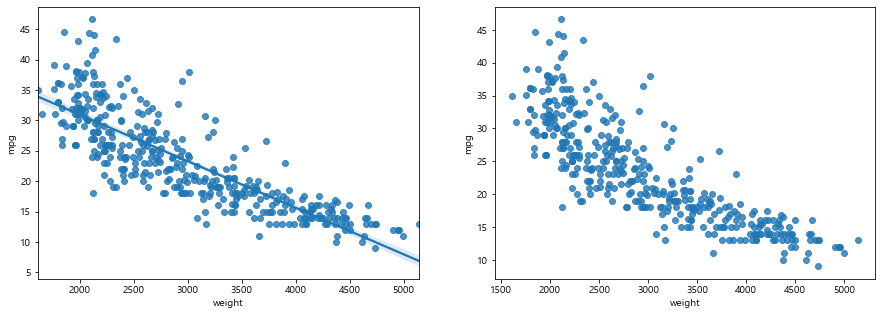

In [54]:
print('seaborn - 선형관계를 파악해 본다면')
print()

fig = plt.figure(figsize=(15,5))

area01 = fig.add_subplot(1,2,1)
area02 = fig.add_subplot(1,2,2)

sns.regplot(x='weight' , y='mpg' , data = mpg_subset_frm , ax=area01)
sns.regplot(x='weight' , y='mpg' , data = mpg_subset_frm , ax=area02 , fit_reg=False)

plt.show()
plt.close()


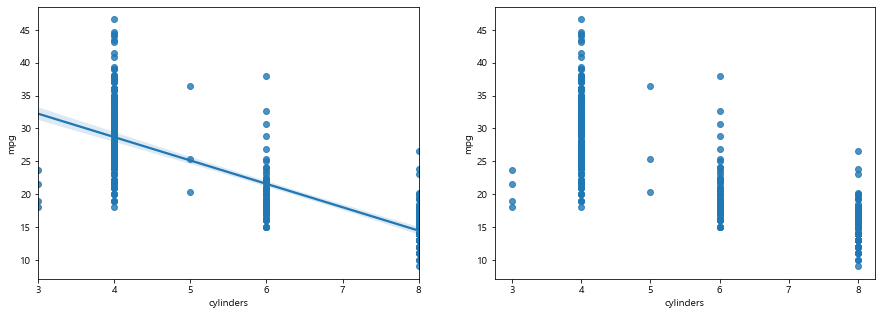

In [55]:
fig = plt.figure(figsize=(15,5))

area01 = fig.add_subplot(1,2,1)
area02 = fig.add_subplot(1,2,2)

sns.regplot(x='cylinders' , y='mpg' , data = mpg_subset_frm , ax=area01)
sns.regplot(x='cylinders' , y='mpg' , data = mpg_subset_frm , ax=area02 , fit_reg=False)

plt.show()
plt.close()


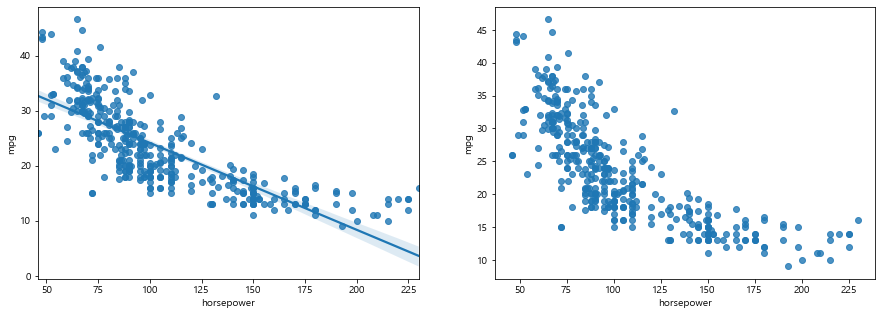

In [56]:
fig = plt.figure(figsize=(15,5))

area01 = fig.add_subplot(1,2,1)
area02 = fig.add_subplot(1,2,2)

sns.regplot(x='horsepower' , y='mpg' , data = mpg_subset_frm , ax=area01)
sns.regplot(x='horsepower' , y='mpg' , data = mpg_subset_frm , ax=area02 , fit_reg=False)

plt.show()
plt.close()

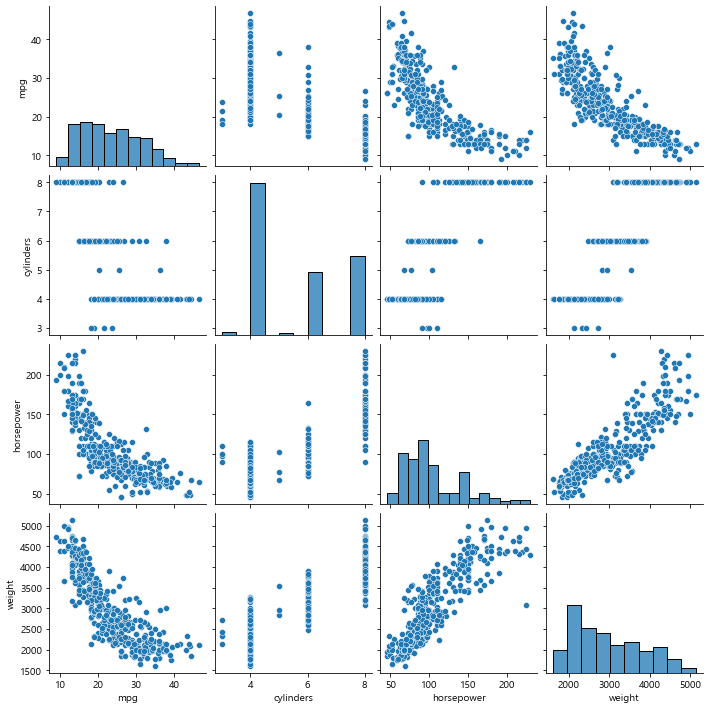

In [57]:
sns.pairplot(mpg_subset_frm)
plt.show()
plt.close()

In [58]:
print('학습을 위해서 독립변수, 종속변수 분리 - ')
print('독립변수 - ')
X = mpg_subset_frm[['cylinders' , 'horsepower' , 'weight']]
print('종속변수 - ')
Y = mpg_subset_frm['mpg']

학습을 위해서 독립변수, 종속변수 분리 - 
독립변수 - 
종속변수 - 


In [60]:
print('데이터 세트 분리 - ')
print()
X_train , X_test , y_train , y_test = train_test_split(X , Y , 
                                                      test_size = 0.2 , 
                                                      random_state = 111)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

데이터 세트 분리 - 



((313, 3), (79, 3), (313,), (79,))

In [62]:
mpg_model = LinearRegression()
mpg_model.fit(X_train, y_train)
print('w = 기울기 : ' , mpg_model.coef_)
print()
print('b = 절편   : ' , mpg_model.intercept_)

w = 기울기 :  [-0.15188535 -0.0589312  -0.00530238]

b = 절편   :  46.34299652357525


In [63]:
print('모델의 신뢰도는 R(결정계수) - ')
print()

r_squared = mpg_model.score(X_test , y_test)
print(r_squared)

모델의 신뢰도는 R(결정계수) - 

0.7138561071545959


In [75]:
print('모델에 전체 X 데이터를 입력하여 예측값을 추출 - ')
y_pred = mpg_model.predict(X_test)
y_pred

모델에 전체 X 데이터를 입력하여 예측값을 추출 - 


array([ 5.61631879,  8.89016346, 27.2669089 , 31.88069281, 23.77003928,
       31.37849609, 30.13820164, 19.94235449, 24.98243948, 24.2272539 ,
       26.6760677 , 14.3628994 , 17.07316274, 20.29093108, 22.69518569,
       27.83696941, 29.94503882,  7.3509445 , 16.34598892, 31.76450258,
       10.44191195, 29.30572823, 25.88252605, 16.37780319, 27.60231175,
       22.823972  , 26.82150912, 26.08717864, 28.6162761 , 27.89180831,
       28.47780922, 25.22563616, 18.88732413, 12.87520827, 25.33168373,
       12.12227054, 10.13846631, 15.65137735, 26.27429701, 26.736814  ,
       27.54384265, 30.27802152, 31.33956433, 24.81158265, 24.81265568,
       27.16246498, 31.20291257, 14.08536062,  7.98722991, 22.20053528,
       33.09433243, 24.08743401, 31.36789133, 19.76371842, 32.30171496,
       26.23187798, 15.39686319, 23.21073237, 29.70643179,  7.20215875,
       20.72255209,  9.07649468, 21.84983033, 29.25544374, 20.84163046,
       28.72428171, 29.30572823, 32.68498216, 30.30150824, 32.65

In [76]:
regression_actual_guess  = pd.DataFrame({
    'actual' : y_test , 
    'guess'  : y_pred
})

In [67]:
regression_actual_guess

,actual,guess
0,18.0,18.887324
1,15.0,15.822583
2,18.0,18.069262
3,16.0,18.085169
4,17.0,18.589643
...,...,...
393,27.0,25.873736
394,44.0,31.376967
395,32.0,28.616276
396,28.0,27.161147


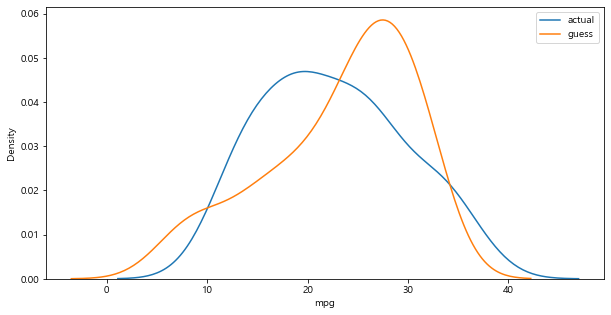

In [77]:
plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y_test , hist=False , label='actual' )
ax2 = sns.distplot(y_pred , hist=False , label='guess' )

plt.legend()
plt.show()
plt.close()

#### 주택 임대료 예측 모델
- manhattan.csv
- https://github.com/Codecademy/datasets/blob/master/streeteasy/manhattan.csv

In [80]:
house_frm = pd.read_csv('./data/manhattan.csv')
house_frm.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [81]:
house_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


In [82]:
house_frm.columns

Index(['rental_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'],
      dtype='object')

In [90]:
X = house_frm[['bedrooms', 'bathrooms', 'size_sqft','min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher']]

Y = house_frm['rent']

상관분석을 위한 시각화 - 


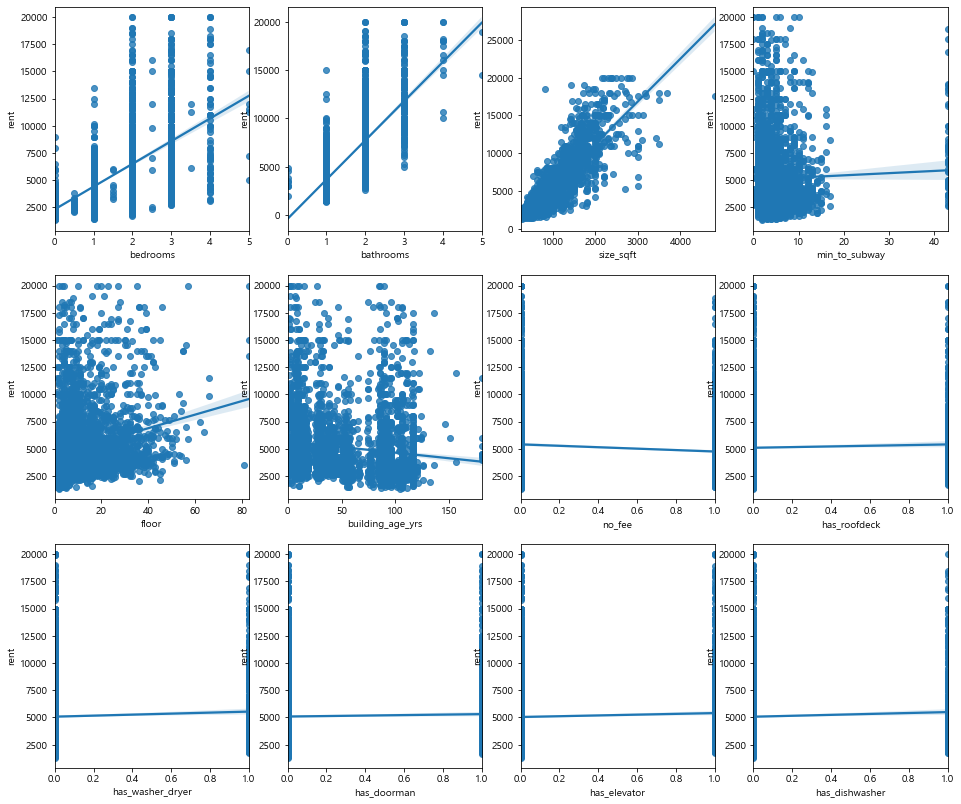

In [94]:
print('상관분석을 위한 시각화 - ')

fig , axs = plt.subplots(figsize=(16, 14) , ncols = 4 , nrows= 3)

for idx , feature in enumerate(X) :
    row = int(idx/4)
    col = idx%4
    sns.regplot(x=feature , y='rent' , data = house_frm , ax=axs[row][col])



In [96]:
print('데이터 세트 분리 8 : 2  - ')
print()
X_train , X_test , y_train , y_test = train_test_split(X , Y , 
                                                      test_size = 0.2 , 
                                                      random_state = 111)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

데이터 세트 분리 8 : 2  - 



((2831, 12), (708, 12), (2831,), (708,))

In [97]:
# 'bedrooms', 'bathrooms', 'size_sqft','min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher']
price_model = LinearRegression()

price_model.fit(X_train, y_train)
print('w = 기울기 : ' , price_model.coef_)
print()
print('b = 절편   : ' , price_model.intercept_)

w = 기울기 :  [-304.72964384 1158.78261246    4.88315724  -18.74411341   22.70787792
   -7.81871649 -125.8524711    -8.97421713  170.5987588   -37.35605549
  -12.59523591  -15.84252636]

b = 절편   :  -351.27412671964976


In [98]:
print('모델의 신뢰도는 R(결정계수) - ')
print()

r_squared = price_model.score(X_test , y_test)
print(r_squared)

모델의 신뢰도는 R(결정계수) - 

0.8023070306419087


In [101]:
my_apt = [[2, 1, 620, 10, 11, 12, 0, 0, 1, 0, 1, 1]]
user_pred = price_model.predict(my_apt)
user_pred

array([3336.28860626])

In [102]:
y_pred = price_model.predict(X_test)
y_pred

array([ 3657.49066491,  6115.17388028,  3032.27215465,  4739.06846442,
        3655.23276625,  4757.81341682, 10624.82731375,  6926.54362484,
        2550.94573828,  3172.45498833,  3714.01267719,  2918.39749581,
        4352.4085515 ,  2811.84657123,  4875.23105977,  5647.55270666,
        3348.25411436,  9762.45861781,  3882.71023453,  2823.09604961,
        5302.05103537,  4485.035002  ,  4630.95804736,  6730.48232929,
        2832.70465671,  3969.86061267,  7769.86260241,  3211.2229926 ,
       12711.8284463 ,  2224.7717609 ,  2675.03768942,  2313.21959025,
        2373.33688126,  7995.01315031,  6255.31205115,  3866.57663633,
        7991.95227816,  3920.97508912,  5355.68893133,  8998.43856597,
        5190.40051695,  4365.00378741,  3808.56330792,  2279.07657398,
        4560.36762287,  3146.03954269,  7878.56100818,  6275.71568828,
        3944.0142973 ,  3473.35357826,  6916.52702118,  4157.81935153,
        3888.95303706,  5199.43376809,  3678.66142774,  6242.16660565,
      

In [103]:
price_actual_guess  = pd.DataFrame({
    'actual_price' : y_test , 
    'guess_price'  : y_pred
})
price_actual_guess

,actual_price,guess_price
2291,3300,3657.490665
1317,5500,6115.173880
2251,3495,3032.272155
361,4500,4739.068464
491,2900,3655.232766
...,...,...
3455,2996,2935.694948
1779,2975,3361.256813
1184,4885,4796.337196
2605,2150,2950.179581


scatter - 실제 임대료 , 예측 임대료 - 



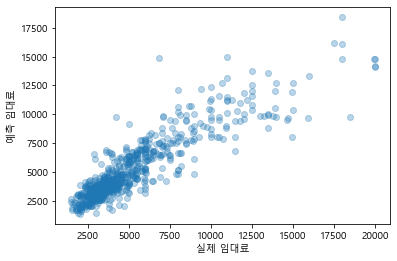

In [106]:
print('scatter - 실제 임대료 , 예측 임대료 - ')
print()

plt.scatter(y_test , y_pred , alpha=0.3)

plt.xlabel('실제 임대료')
plt.ylabel('예측 임대료')
plt.show()
plt.close()

#### iris 회귀

In [107]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [120]:
print('data 와 target 을 프레임으로 만들고 target 값을 target_names 변경하여 최종 프레임 생성 - ')
print('0 -> setosa , 1 -> versicolor , 2 -> virginica')
print()
X = pd.DataFrame(data = iris.data   , columns = iris.feature_names)
Y = pd.DataFrame(data = iris.target , columns = ['species'])

Y['species'] = Y['species'].replace([0,1,2],['setosa','versicolor','virginica'])


data 와 target 을 프레임으로 만들고 target 값을 target_names 변경하여 최종 프레임 생성 - 
0 -> setosa , 1 -> versicolor , 2 -> virginica



In [121]:
iris_frm = pd.concat([X,Y] , axis = 1)
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


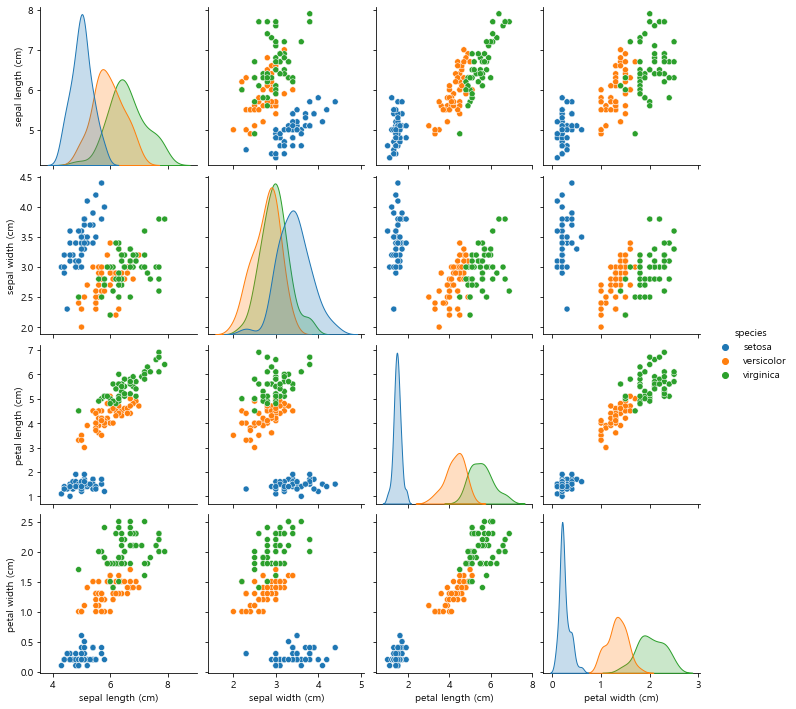

In [123]:
sns.pairplot(iris_frm , hue='species')

In [125]:
iris_frm['species'] = iris_frm['species'].replace(['setosa','versicolor','virginica'] , [0,1,2])

In [126]:
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [131]:
print('sepal length 예측하기 위해서 Y <- sepal length (cm) - ')
X = iris_frm.drop('sepal length (cm)' , axis = 1) 
Y = iris_frm['sepal length (cm)']

sepal length 예측하기 위해서 Y <- sepal length (cm) - 


In [141]:
iris_model = LinearRegression()
iris_model.fit(X, Y)

print('모델의 신뢰도는 R(결정계수) - ')
print()
r_squared = iris_model.score(X , Y)
print(r_squared)

print('w = 기울기 : ' , iris_model.coef_)
print()
print('b = 절편   : ' , iris_model.intercept_)

print()
print('사용자 데이터로 예측 - ')

user_pred = iris_model.predict([[4.2, 1.3, 0.2, 1.0]])
print('sepal length guess - ' , user_pred)

모델의 신뢰도는 R(결정계수) - 

0.8621931701975808
w = 기울기 :  [ 0.62527882  0.74292448 -0.40447855 -0.22635635]

b = 절편   :  1.8511983449847413

사용자 데이터로 예측 - 
sepal length guess -  [5.13591913]


In [142]:
print('데이터 세트 분리 8 : 2  - ')
print()
X_train , X_test , y_train , y_test = train_test_split(X , Y , 
                                                      test_size = 0.2 , 
                                                      random_state = 200 ) 

X_train.shape , X_test.shape , y_train.shape , y_test.shape

데이터 세트 분리 8 : 2  - 



((120, 4), (30, 4), (120,), (30,))

In [143]:
iris_model = LinearRegression()
iris_model.fit(X_train, y_train)

print('모델의 신뢰도는 R(결정계수) - ')
print()
r_squared = iris_model.score(X_test , y_test)
print(r_squared)

print('w = 기울기 : ' , iris_model.coef_)
print()
print('b = 절편   : ' , iris_model.intercept_)


모델의 신뢰도는 R(결정계수) - 

0.8608904650947196
w = 기울기 :  [ 0.66198457  0.78299303 -0.42708997 -0.291799  ]

b = 절편   :  1.6920117622235376


In [145]:
y_pred = iris_model.predict(X_test)

sepal_length_actual_guess  = pd.DataFrame({
    'actual_sepal_length' : y_test , 
    'guess_sepal_length'  : y_pred
})
# sepal_length_actual_guess


,actual_sepal_length,guess_sepal_length
84,5.4,6.269000
122,7.7,7.353844
28,5.2,4.953532
24,4.8,5.345028
75,6.6,6.233410
109,7.2,7.200091
81,5.5,5.458960
98,5.1,4.934354
80,5.5,5.494550
100,6.3,6.923196


In [154]:
print('성능평가 지표 - ')
print()

print('mae  - ' , mean_absolute_error(y_test , y_pred) )
print('mse  - ' , mean_squared_error(y_test , y_pred) )
print('rmse - ' , np.sqrt(mean_squared_error(y_test , y_pred) ) )
print('R    - ' , iris_model.score(X_test , y_test) )

성능평가 지표 - 

mae  -  0.2558151623090265
mse  -  0.11211610248766032
rmse -  0.33483742695173774
R    -  0.8608904650947196


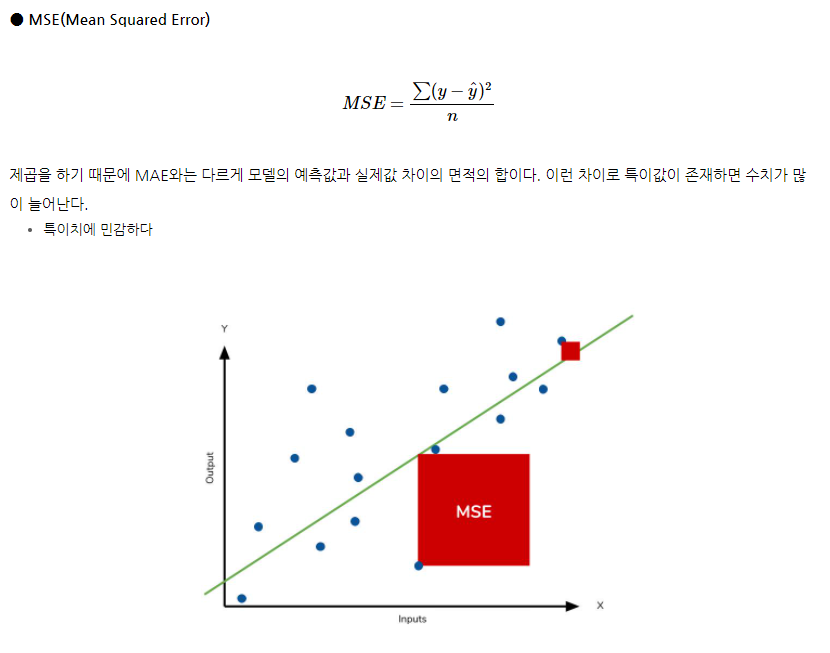

In [148]:
Image('c:/img/regression-eval-mse.png', width = 700)

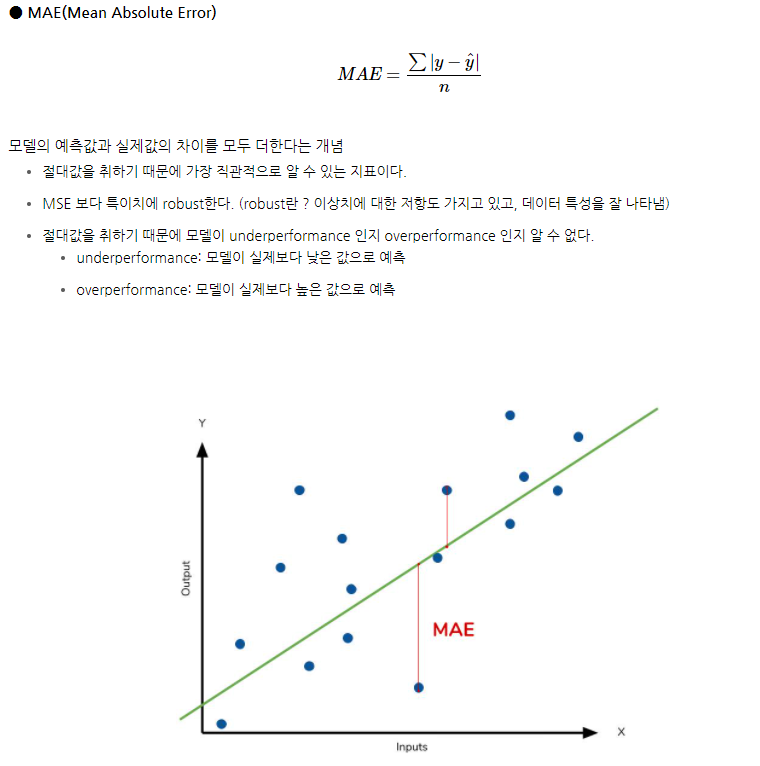

In [149]:
Image('c:/img/regression-eval-mae.png', width = 700)

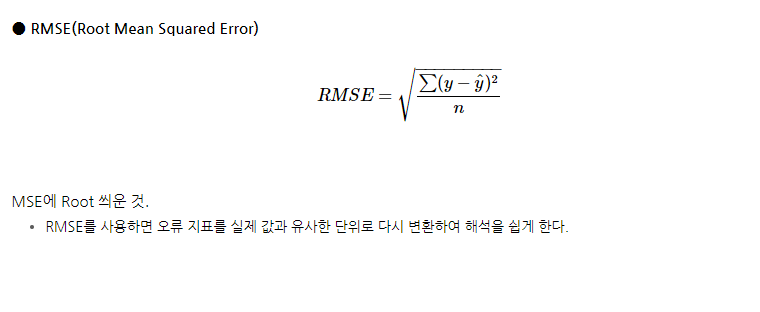

In [153]:
Image('c:/img/regression-eval-rmse.png', width = 700)